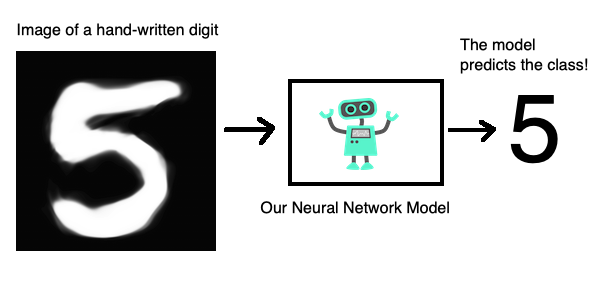

In [41]:
from IPython.display import Image
Image("image/1_1.png")

In [39]:
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.9.1


# Data Set (import MNIST)

In [11]:
from tensorflow.keras.datasets import mnist

In [12]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# Shapes of Imported Arrays

In [16]:
print("xtrain shape: ", xtrain.shape)
print("ytrain shape: ", ytrain.shape)
print("xtest shape: ", xtest.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (60000, 28, 28)
ytrain shape:  (60000,)
xtest shape:  (10000, 28, 28)
ytest shape:  (10000,)


28 rows and 28 columns, so height and width would be 28 pixels.
60000 and 10000 represents the example of training and testing

# Plot an Image Example

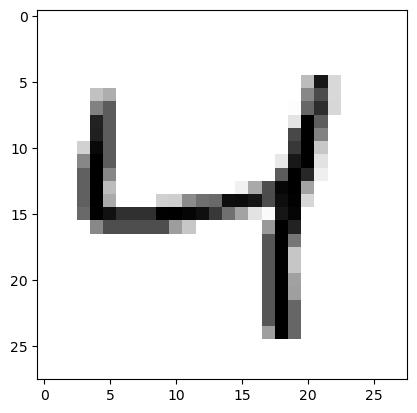

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(xtrain[2], cmap = "binary")
plt.show()

#### can get access of 60000 examples of train data set by putting the index number in xtrain

# Display Labels

In [80]:
ytrain[2]

4

In [31]:
print(set(ytrain))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding

after this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0.

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

# Encoding Labels

In [54]:
from tensorflow.keras.utils import to_categorical

ytrain_encoded = to_categorical(ytrain)
ytest_encoded = to_categorical(ytest)

# Validated Shapes

In [57]:
print("ytrain encoded shape:", ytrain_encoded.shape)
print("ytest encoded shape:", ytest_encoded.shape)

ytrain encoded shape: (60000, 10)
ytest encoded shape: (10000, 10)


# Display Encoded Labels

In [58]:
ytrain_encoded[7841]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Neural Networks

#### Linear Equations

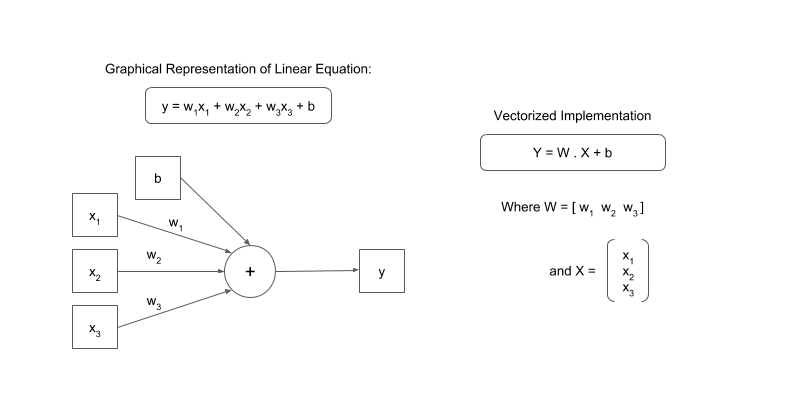

In [64]:
Image("image/1_2.png")

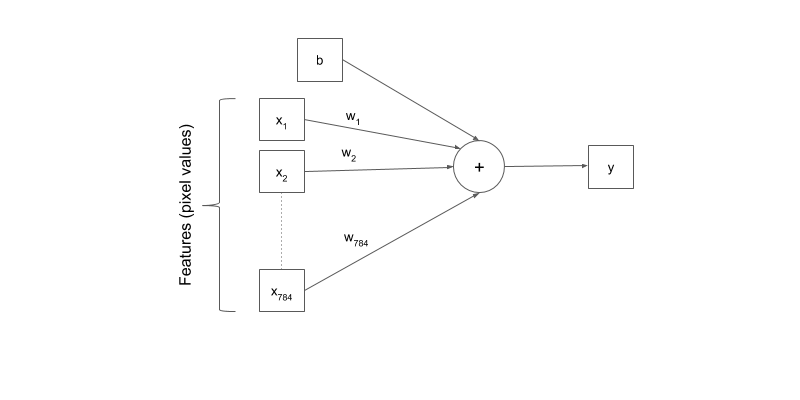

In [65]:
Image("image/1_3.png")

# Neural Networks

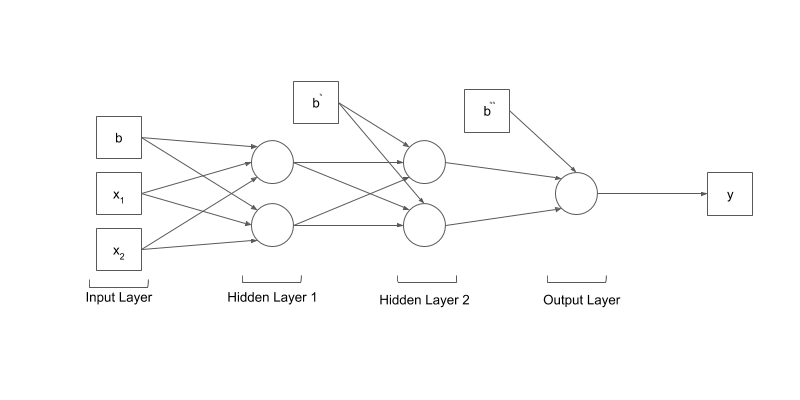

In [66]:
Image("image/1_4.png")

# Preprocessing the Examples
#### Unrolling N-dimensional Arrays to Vectors

In [67]:
import numpy as np

In [73]:
xtrain_reshape = np.reshape(xtrain, (60000, 784)) # 28 row * 28 columns = 784
xtest_reshape = np.reshape(xtest, (10000, 784))

print("xtrain reshape shape:", xtrain_reshape.shape)
print("xtest reshape shape:", xtest_reshape.shape)

xtrain reshape shape: (60000, 784)
xtest reshape shape: (10000, 784)


### Display Pixel Values

In [81]:
print(set(xtrain_reshape[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [90]:
xmean = np.mean(xtrain_reshape)
xstd = np.std(xtrain_reshape)

epsilon = 1e-10

xtrain_norm = (xtrain_reshape - xmean) / (xstd + epsilon)
xtest_norm = (xtest_reshape - xmean) / (xstd + epsilon)

In [83]:
xmean

33.318421449829934

In [85]:
xstd

78.56748998339798

In [91]:
xtrain_norm

array([[-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       ...,
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389]])